In [88]:
#importing the libraries

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.impute import SimpleImputer

from datetime import date

In [89]:
df = pd.read_csv('listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.55,2,48
2,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,2017-07-03,0.03,1,354
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,2019-07-07,0.63,1,301
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,2019-07-10,1.19,1,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,38725567,Acogedor piso de 2 Hab. Hospital La paz 4 Torres,226958922,Cristóbal,Chamartín,Castilla,40.47847,-3.68395,Entire home/apt,100,1,0,NaN,NaN,4,108
20833,38726351,a 25-minutos del centro de Madrid near Subway,178608863,Rostyslav,Puente de Vallecas,Palomeras Sureste,40.38533,-3.63968,Private room,24,2,0,NaN,NaN,4,74
20834,38727654,Apartamento Confortable a 300 m de la Gran Vía.,182062359,Jose Maciel,Centro,Universidad,40.42182,-3.70336,Entire home/apt,75,2,0,NaN,NaN,2,196
20835,38728727,Estudio en pleno Lavapiés,31425029,Valeska,Centro,Embajadores,40.40896,-3.70107,Entire home/apt,45,2,0,NaN,NaN,1,104


In [90]:
#очень большая выборка, поэтому будем исключать выбросы и неточные данные
df.shape

(20837, 16)

In [91]:
#некоторые параметры явно текстовые и не имеющие никакого смысла для нашей модели 
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [92]:
#типы данных в модели
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [93]:
#видим пропущенные данные в некоторых возможно важных параметрах в задаче. Попробуем их устранить 
df.isna().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [94]:
#выкидываем пропущенные значения - у нас слишком большая выборка для доступных мощностей
df = df.dropna()

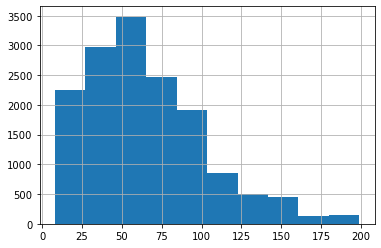

In [95]:
#отбрасываем аномалии. Выборка более-менее сбалансированная, будем прогнозировать эту переменную

df = df.loc[df['price'] < 200]
df.price.hist()

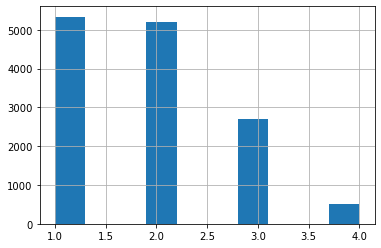

In [96]:
#откинем квартиры с большим требованием миниимального количестаа ночей
df = df.loc[df['minimum_nights'] < 5]
df.minimum_nights.hist()

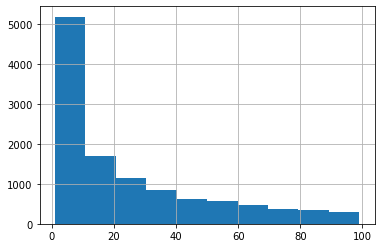

In [97]:
#количество обзоров все же распределено неравномерно, но попробуем построить модель без логарифмирования
df = df.loc[df['number_of_reviews'] < 100]
df.number_of_reviews.hist()

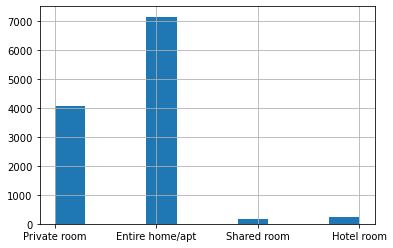

In [98]:
#распределение квартир очень важно учесть 
df.room_type.hist()

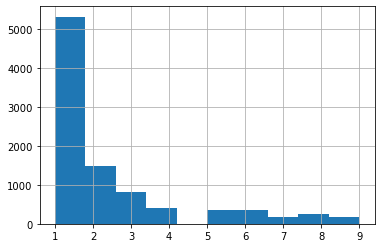

In [99]:
#тоже нужный параметр
df = df.loc[df['calculated_host_listings_count'] < 10]
df.calculated_host_listings_count.hist() 

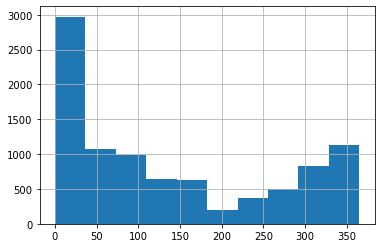

In [100]:
#тоже интересный параметр, который нам надо изучить
df.availability_365.hist()

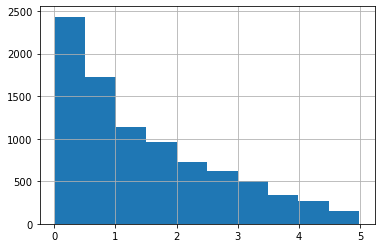

In [101]:
#так же нужный параметр
df = df.loc[df['reviews_per_month'] < 5]
df.reviews_per_month.hist()

In [102]:
#смена типа для параметра "последнего отзыва по времени" - для возможности учета в модели

df.apply(lambda x: (date.today() - date.fromisoformat(x['last_review'])).days, axis=1)

0         831
1        1247
3         890
6        1658
7         890
         ... 
20720     816
20730     819
20743     821
20788     819
20807     817
Length: 8849, dtype: int64

In [103]:
print([val for val in df['last_review'] if isinstance(val, str)])

['2019-09-04', '2018-07-15', '2019-07-07', '2017-05-30', '2019-07-07', '2018-12-09', '2019-07-29', '2019-09-09', '2019-06-24', '2019-07-27', '2019-06-23', '2019-06-09', '2016-06-24', '2019-07-15', '2019-04-10', '2019-06-13', '2019-06-04', '2019-07-24', '2019-09-14', '2018-12-16', '2019-07-14', '2019-09-09', '2019-07-29', '2019-09-15', '2019-06-09', '2011-12-30', '2017-12-10', '2017-08-29', '2016-05-29', '2016-09-24', '2019-08-22', '2019-06-02', '2019-07-19', '2019-07-30', '2019-07-14', '2019-04-08', '2019-09-15', '2019-09-16', '2019-07-28', '2019-07-13', '2019-08-08', '2014-11-08', '2019-04-21', '2019-07-07', '2019-06-13', '2019-08-25', '2019-09-02', '2019-09-08', '2017-04-18', '2019-05-27', '2019-06-03', '2019-08-15', '2019-09-08', '2019-04-11', '2019-04-11', '2018-12-15', '2018-10-19', '2019-09-07', '2019-07-24', '2019-08-23', '2019-08-05', '2019-09-10', '2017-05-02', '2012-09-23', '2019-07-07', '2018-05-13', '2019-06-23', '2019-07-14', '2019-07-02', '2018-04-24', '2018-12-31', '2018

In [104]:
df['last_review'] = [date.fromisoformat(val) if isinstance(val, str) else val for val in df['last_review']]

In [105]:
df['datetime_diff'] = df.apply(lambda x: (date.today() - x['last_review']).days, axis=1)

In [106]:
#откидываем бесполезные параметры

df = df.drop(columns = ['last_review'], );
df = df.drop(columns = ['host_id']);
df = df.drop(columns = ['host_name']);
df = df.drop(columns = ['name']);
df = df.drop(columns = ['neighbourhood'], );
df = df.drop(columns = ['id'], );
df = df.drop(columns = ['neighbourhood_group'], )

In [107]:
#binary coding - вносим в модель учет типа апартаментов

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse=False categorical_features=...
new_ohe_features = ohe.fit_transform(df.room_type.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns=['room_type=' + str(i) for i in range(new_ohe_features.shape[1])])
df = pd.concat([df, tmp], axis=1)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3
0,40.45628,-3.67763,Private room,70.0,1.0,65.0,0.56,1.0,53.0,831.0,0.0,0.0,1.0,0.0
1,40.40341,-3.74084,Private room,17.0,4.0,33.0,0.55,2.0,48.0,1247.0,0.0,0.0,1.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
3,40.41995,-3.69764,Entire home/apt,115.0,3.0,64.0,0.63,1.0,301.0,890.0,1.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20720,40.38460,-3.65037,Entire home/apt,39.0,2.0,2.0,2.00,1.0,48.0,816.0,NaN,NaN,NaN,NaN
20730,40.43574,-3.71222,Shared room,23.0,1.0,1.0,1.00,1.0,210.0,819.0,NaN,NaN,NaN,NaN
20743,40.39072,-3.72329,Entire home/apt,75.0,1.0,1.0,1.00,2.0,349.0,821.0,NaN,NaN,NaN,NaN
20788,40.41250,-3.71472,Entire home/apt,55.0,1.0,1.0,1.00,1.0,229.0,819.0,NaN,NaN,NaN,NaN


In [108]:
#откидываем параметры, которые мы не сможем использовать, либо которые не дадут адекватной оценки
df = df.drop(columns = ['room_type'], );
df = df.drop(columns = ['latitude'], );  
df = df.drop(columns = ['longitude'], );
df = df.drop(columns = ['minimum_nights'], )

In [109]:
df

,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3
0,70.0,65.0,0.56,1.0,53.0,831.0,0.0,0.0,1.0,0.0
1,17.0,33.0,0.55,2.0,48.0,1247.0,0.0,0.0,1.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
3,115.0,64.0,0.63,1.0,301.0,890.0,1.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20720,39.0,2.0,2.00,1.0,48.0,816.0,NaN,NaN,NaN,NaN
20730,23.0,1.0,1.00,1.0,210.0,819.0,NaN,NaN,NaN,NaN
20743,75.0,1.0,1.00,2.0,349.0,821.0,NaN,NaN,NaN,NaN
20788,55.0,1.0,1.00,1.0,229.0,819.0,NaN,NaN,NaN,NaN


In [110]:
#меняем порядок колонок для работы в дальнейшем
new_order = [1,3,4,5,6,7,8,9,0]
df = df[df.columns[new_order]]
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,831.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1247.0,0.0,0.0,1.0,0.0,17.0
2,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN
3,64.0,1.0,301.0,890.0,1.0,0.0,0.0,0.0,115.0
4,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
20720,2.0,1.0,48.0,816.0,NaN,NaN,NaN,NaN,39.0
20730,1.0,1.0,210.0,819.0,NaN,NaN,NaN,NaN,23.0
20743,1.0,2.0,349.0,821.0,NaN,NaN,NaN,NaN,75.0
20788,1.0,1.0,229.0,819.0,NaN,NaN,NaN,NaN,55.0


In [111]:
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,831.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1247.0,0.0,0.0,1.0,0.0,17.0
3,64.0,1.0,301.0,890.0,1.0,0.0,0.0,0.0,115.0
6,8.0,1.0,0.0,1658.0,0.0,0.0,1.0,0.0,54.0
7,38.0,3.0,337.0,890.0,1.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...
20720,2.0,1.0,48.0,816.0,NaN,NaN,NaN,NaN,39.0
20730,1.0,1.0,210.0,819.0,NaN,NaN,NaN,NaN,23.0
20743,1.0,2.0,349.0,821.0,NaN,NaN,NaN,NaN,75.0
20788,1.0,1.0,229.0,819.0,NaN,NaN,NaN,NaN,55.0


In [115]:
#сохраняем обработанные данные
df.to_csv('listings_prepar.csv', sep=',', index=False)

In [116]:
df = df.dropna()

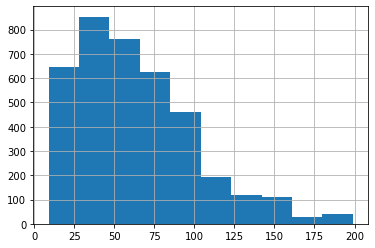

In [117]:
df.price.hist()

In [118]:
#statistics

df.describe()

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
count,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000,3844.000000
mean,35.188085,2.190166,136.689126,1102.677940,0.568939,0.009625,0.408169,0.013267,63.680281
std,29.454680,1.956992,134.421569,397.733788,0.495289,0.097648,0.491559,0.114433,37.175779
min,1.000000,1.000000,0.000000,817.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,8.000000,1.000000,0.000000,838.000000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,28.000000,1.000000,86.000000,903.000000,1.000000,0.000000,0.000000,0.000000,60.000000
75%,59.000000,3.000000,274.250000,1248.250000,1.000000,0.000000,1.000000,0.000000,84.000000
max,99.000000,9.000000,365.000000,3636.000000,1.000000,1.000000,1.000000,1.000000,199.000000


In [119]:
#мы очень жестко почистили данные, так как их было слишком много. Парметры, которые мы отобрали, могут помочь предсказать цену

In [ ]:
#зато теперь у нас нет пропусков, лишних данных, данных неправильного формата